In [11]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

EXP_TYPE = 'pad'
EXP_NAME = 'shift'
LIST_VALS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

subdir_pattern = '*/*/eval.csv'  # This example finds all .txt files in all subdirectories

list_of_root_dirs_by_augment_degree = proc.generate_root_dirs_by_experiment_and_augment_degree_new(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='cartpole_balance_sparse',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_dict = proc.load_datasets_by_directory(list_of_root_dirs_by_augment_degree, subdir_pattern, show=False)

In [12]:
for root_directory in list_of_root_dirs_by_augment_degree:
    print(root_directory, ' : ' ,len(datasets_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-0  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-1  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-2  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-3  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-4  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-5  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-6  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-7  :  10
/Users/victor/Documents/

In [13]:
column_name = 'episode_reward'
result_stats = proc.generate_stats_for_directories(list_of_root_dirs_by_augment_degree, datasets_dict, column_name)
summary_statistics = proc.compute_summary_stats(result_stats)

for key, stats in summary_statistics.items():
    print(f"Directory: {key}")
    print("Sum Statistics:", stats['Sum Statistics'])
    print("Max Statistics:", stats['Max Statistics'])


print("\n...printing Mean over Sums")
mean_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=True)

print("\n...printing Max over Sums")
max_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=True)



print("\n...printing Max over Maxes")
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')
sorted_items = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=True)

print("\n...printing Mean over Maxes")
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
sorted_items = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=True)


Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-0
Sum Statistics: {'Sum Min': 90410.40000000001, 'Sum Max': 104097.1, 'Sum Mean': 99775.43999999999}
Max Statistics: {'Max Min': 1000.0, 'Max Max': 1000.0, 'Max Mean': 1000.0}
Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-1
Sum Statistics: {'Sum Min': 98609.00000000001, 'Sum Max': 107927.0, 'Sum Mean': 105676.19999999998}
Max Statistics: {'Max Min': 1000.0, 'Max Max': 1000.0, 'Max Mean': 1000.0}
Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_pixels-True-shift-2
Sum Statistics: {'Sum Min': 100995.4, 'Sum Max': 108253.7, 'Sum Mean': 106882.64000000001}
Max Statistics: {'Max Min': 1000.0, 'Max Max': 1000.0, 'Max Mean': 1000.0}
Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse/drqv2_aug_p


...printing Max over Maxes


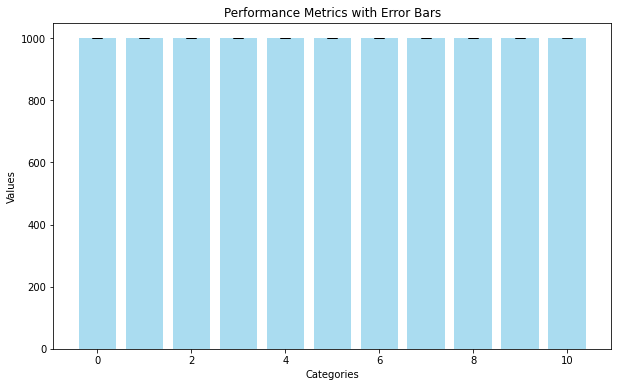

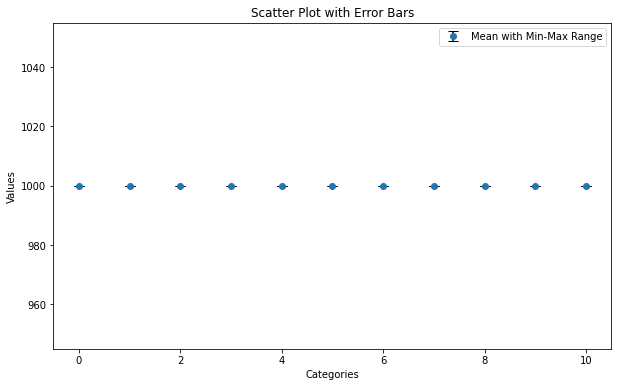

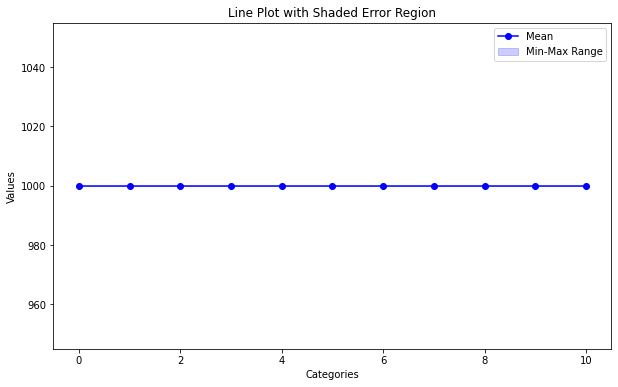


...printing Max over Maxes


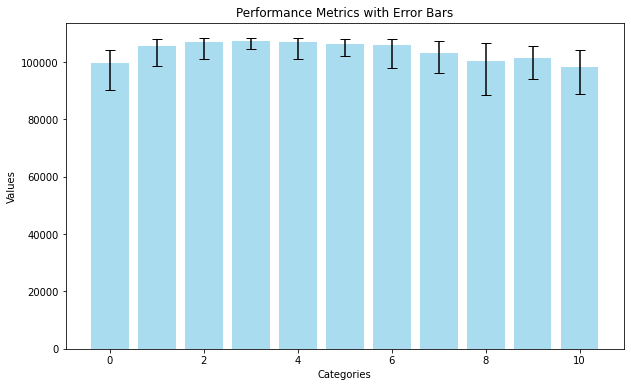

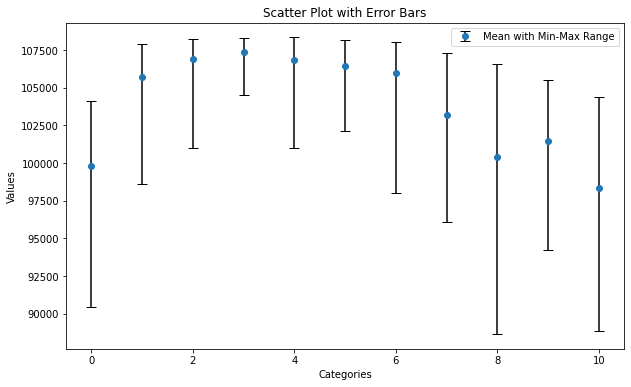

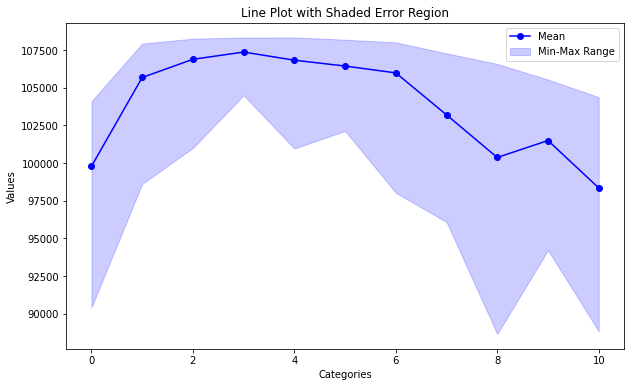

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with mean, min, and max values for each category
print("\n...printing Max over Maxes")
min_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Min', stat_type='Max Statistics')
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')

categories = list(max_vals_over_max_performance.keys())
mean_vals = list(mean_vals_over_max_performance.values())
min_vals = list(min_vals_over_max_performance.values())
max_vals = list(max_vals_over_max_performance.values())

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_vals) - np.array(min_vals)
upper_error = np.array(max_vals) - np.array(mean_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_vals, max_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()




# Sample data with mean, min, and max values for each category
print("\n...printing Max over Maxes")
min_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Min', stat_type='Sum Statistics')
mean_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
max_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')

categories = list(min_vals_over_sum_performance.keys())
mean_sum_vals = list(mean_vals_over_sum_performance.values())
min_sum_vals = list(min_vals_over_sum_performance.values())
max_sum_vals = list(max_vals_over_sum_performance.values())

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_sum_vals) - np.array(min_sum_vals)
upper_error = np.array(max_sum_vals) - np.array(mean_sum_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_sum_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_sum_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_sum_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

In [15]:
subdir_pattern = '*/*/augment.csv'
EXP_NAME = 'shift'

list_of_root_dirs_by_augment_stats = proc.generate_root_dirs_by_experiment_and_augment_degree_new_augment_stats(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='cartpole_balance_sparse_augment_stats',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_augstats_dict = proc.load_datasets_by_directory(
    list_of_root_dirs_by_augment_stats, subdir_pattern, show=False)


for root_directory in list_of_root_dirs_by_augment_stats:
    print(root_directory, ' : ' ,len(datasets_augstats_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-0  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-4  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-5  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pa

[(10.0, 0.5103219413161277), (9.0, 0.5157167556285858), (8.0, 0.5181286771893501), (7.0, 0.5331846047639847), (6.0, 0.542104000210762), (5.0, 0.5585771251916886), (4.0, 0.5880986834168435), (3.0, 0.6258374986648559), (2.0, 0.6906039717197419), (1.0, 0.7934957091808319), (0.0, 0.9999995827674866)]


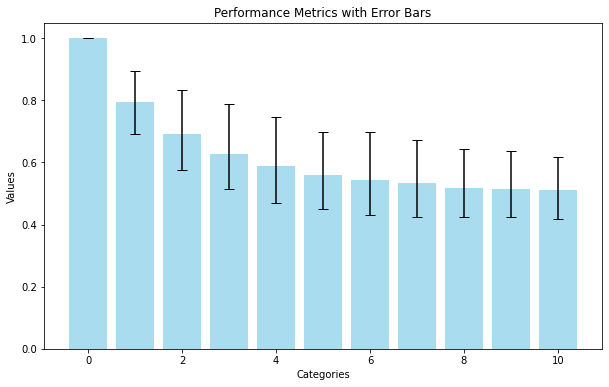

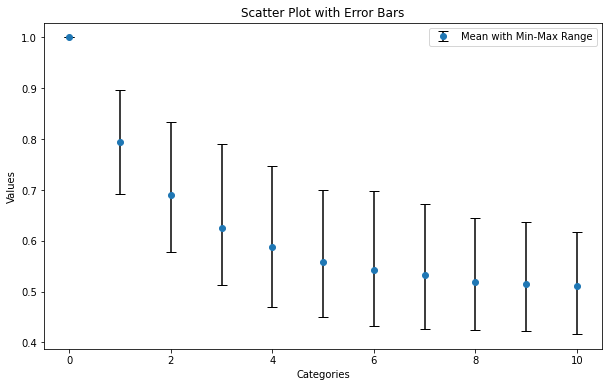

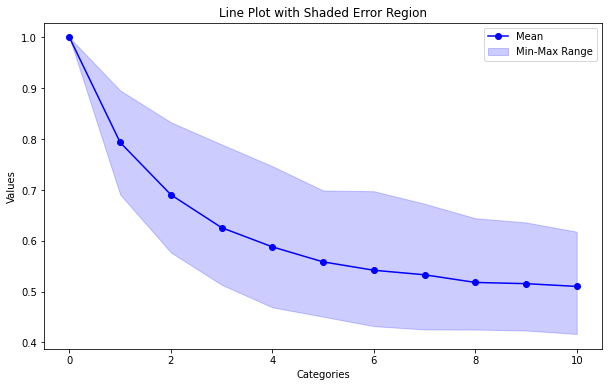

In [16]:
stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, 'ssim_dist')
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_mean_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

min_vals_statdistances = proc.extract_stat(result_stats, stat_name='Min', stat_type=None)
sorted_min_diststats = proc.print_sorted(min_vals_statdistances, sort_by='value', desc=False, print_it=False)

max_vals_statdistances = proc.extract_stat(result_stats, stat_name='Max', stat_type=None)
sorted_max_diststats = proc.print_sorted(max_vals_statdistances, sort_by='value', desc=False, print_it=False)


print(sorted_mean_diststats)
categories = [sm[0] for sm in sorted_mean_diststats]
mean_sum_stats_vals = [sm[1] for sm in sorted_mean_diststats]
min_sum_vals = [sm[1] for sm in sorted_min_diststats]
max_sum_vals = [sm[1] for sm in sorted_max_diststats]

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_sum_stats_vals) - np.array(min_sum_vals)
upper_error = np.array(max_sum_vals) - np.array(mean_sum_stats_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_sum_stats_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_sum_stats_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_sum_stats_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()


# for distance in stats_column_names:
#     result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
#     mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
#     print(mean_vals_statdistances)
#     sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
#     print(sorted_items_diststats)
#     print()


[(0.0, 13623022.352), (1.0, 14378197.63), (2.0, 14741267.806), (3.0, 15010075.482), (4.0, 15202445.638), (5.0, 15402803.442), (6.0, 15553931.878), (7.0, 15672547.382), (8.0, 15833427.346), (9.0, 15898059.728), (10.0, 15985722.08)]


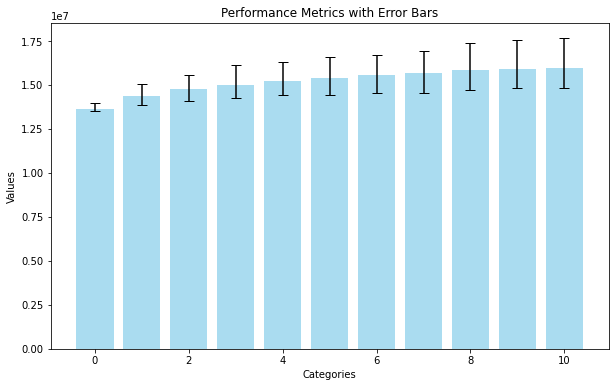

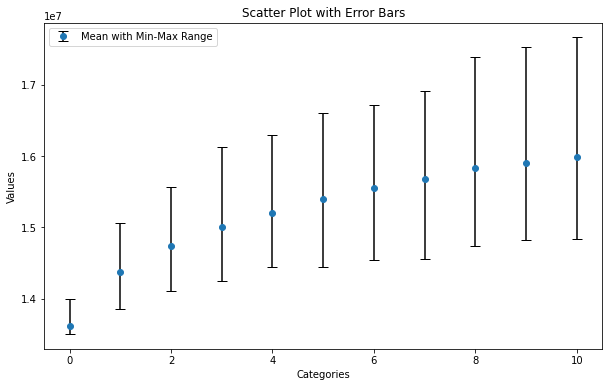

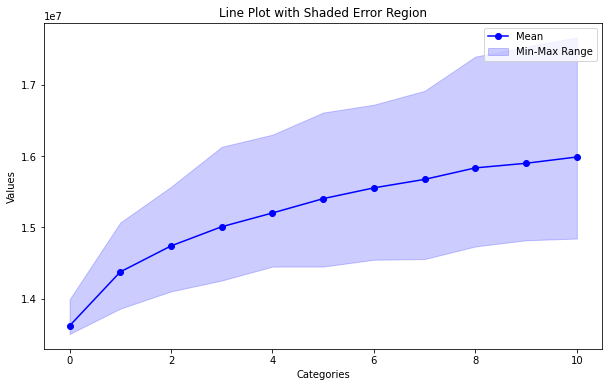

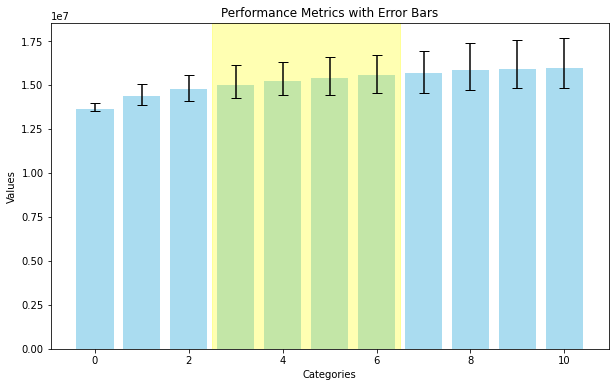

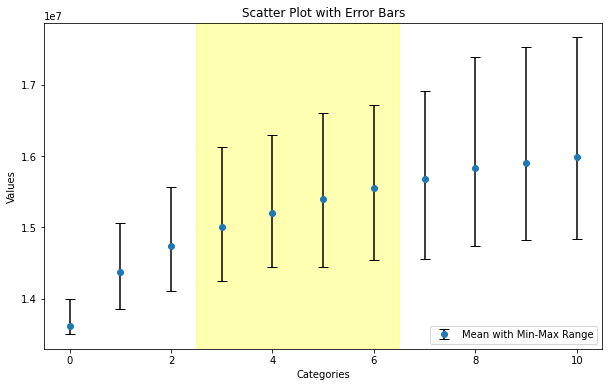

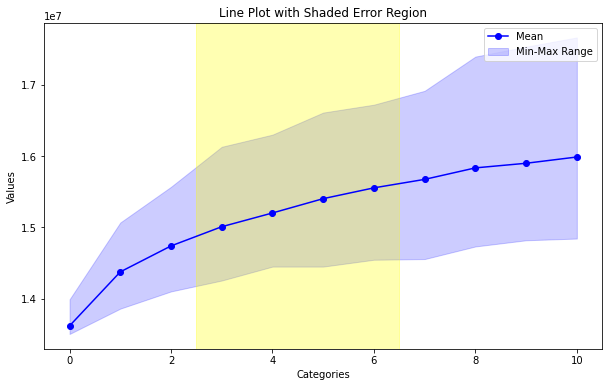

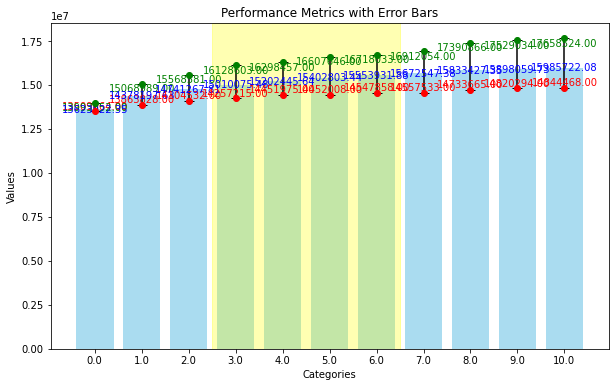

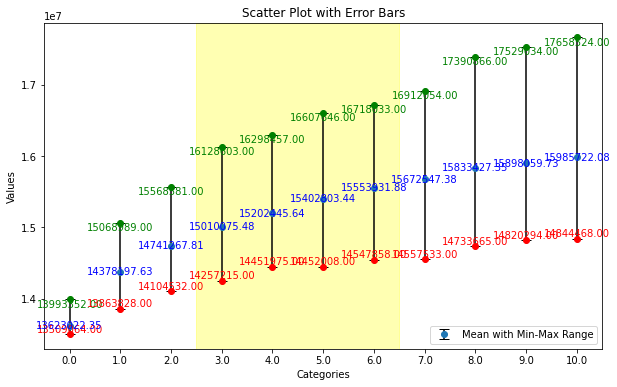

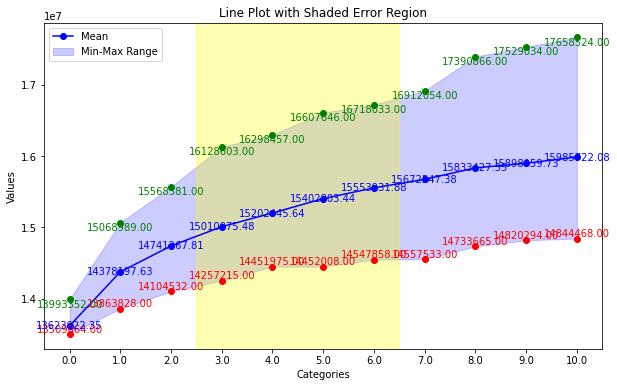

In [17]:
stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, 'manhattan')
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_mean_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

min_vals_statdistances = proc.extract_stat(result_stats, stat_name='Min', stat_type=None)
sorted_min_diststats = proc.print_sorted(min_vals_statdistances, sort_by='value', desc=False, print_it=False)

max_vals_statdistances = proc.extract_stat(result_stats, stat_name='Max', stat_type=None)
sorted_max_diststats = proc.print_sorted(max_vals_statdistances, sort_by='value', desc=False, print_it=False)


print(sorted_mean_diststats)
categories = [sm[0] for sm in sorted_mean_diststats]
mean_sum_stats_vals = [sm[1] for sm in sorted_mean_diststats]
min_sum_vals = [sm[1] for sm in sorted_min_diststats]
max_sum_vals = [sm[1] for sm in sorted_max_diststats]

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_sum_stats_vals) - np.array(min_sum_vals)
upper_error = np.array(max_sum_vals) - np.array(mean_sum_stats_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_sum_stats_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_sum_stats_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_sum_stats_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()


# Define the range for the vertical highlight
highlight_xmin = 3  # Index of the second category
highlight_xmax = 6  # Index of the fourth category

# Bar Plot with Error Bars and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_sum_stats_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Scatter Plot with Error Bars and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_sum_stats_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_sum_stats_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()













# Bar Plot with Error Bars and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.bar(category_indices, mean_sum_stats_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)

# Plotting min and max values as scatter points
plt.scatter(category_indices, min_sum_vals, color='red', zorder=5)
plt.scatter(category_indices, max_sum_vals, color='green', zorder=5)

# Annotate the actual values
for i in range(len(categories)):
    plt.text(category_indices[i], min_sum_vals[i], f'{min_sum_vals[i]:.2f}', ha='center', va='bottom', color='red')
    plt.text(category_indices[i], max_sum_vals[i], f'{max_sum_vals[i]:.2f}', ha='center', va='top', color='green')
    plt.text(category_indices[i], mean_sum_stats_vals[i], f'{mean_sum_stats_vals[i]:.2f}', ha='center', va='center', color='blue')

plt.xticks(category_indices, categories)
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Scatter Plot with Error Bars and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.errorbar(category_indices, mean_sum_stats_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)

# Plotting min and max values as scatter points
plt.scatter(category_indices, min_sum_vals, color='red', zorder=5)
plt.scatter(category_indices, max_sum_vals, color='green', zorder=5)

# Annotate the actual values
for i in range(len(categories)):
    plt.text(category_indices[i], min_sum_vals[i], f'{min_sum_vals[i]:.2f}', ha='center', va='bottom', color='red')
    plt.text(category_indices[i], max_sum_vals[i], f'{max_sum_vals[i]:.2f}', ha='center', va='top', color='green')
    plt.text(category_indices[i], mean_sum_stats_vals[i], f'{mean_sum_stats_vals[i]:.2f}', ha='center', va='center', color='blue')

plt.xticks(category_indices, categories)
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region and Vertical Highlight
plt.figure(figsize=(10, 6))
plt.plot(category_indices, mean_sum_stats_vals, marker='o', color='b', label='Mean')
plt.fill_between(category_indices, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.axvspan(highlight_xmin - 0.5, highlight_xmax + 0.5, color='yellow', alpha=0.3)

# Plotting min and max values as scatter points
plt.scatter(category_indices, min_sum_vals, color='red', zorder=5)
plt.scatter(category_indices, max_sum_vals, color='green', zorder=5)

# Annotate the actual values
for i in range(len(categories)):
    plt.text(category_indices[i], min_sum_vals[i], f'{min_sum_vals[i]:.2f}', ha='center', va='bottom', color='red')
    plt.text(category_indices[i], max_sum_vals[i], f'{max_sum_vals[i]:.2f}', ha='center', va='top', color='green')
    plt.text(category_indices[i], mean_sum_stats_vals[i], f'{mean_sum_stats_vals[i]:.2f}', ha='center', va='center', color='blue')

plt.xticks(category_indices, categories)
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()


In [35]:
stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

sorted_mean_vals_over_sums_performance = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_sums_performance = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
# sorted_mean_vals_over_max_performance = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=False, print_it=False)
# sorted_max_vals_over_max_performance = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=False, print_it=False)


for distance in stats_column_names:
    result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
    print(result_stats)
    
    mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
    print(mean_vals_statdistances)
    sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
    print(sorted_items_diststats)
#     print("\n", distance)
#     correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
#     print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

#     correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
#     print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

#     correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
#     print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

#     correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
#     print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)
    print()


{'/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-0': {'Min': 13509064.0, 'Max': 13993352.0, 'Mean': 13623022.352}, '/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-1': {'Min': 13863828.0, 'Max': 15068989.0, 'Mean': 14378197.63}, '/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-2': {'Min': 14104532.0, 'Max': 15568581.0, 'Mean': 14741267.806}, '/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-3': {'Min': 14257215.0, 'Max': 16128603.0, 'Mean': 15010075.482}, '/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/cartpole_balance_sparse_augment_stats/drqv2_aug_pixels-True-shift-4': {'Min': 14452008.0, 'Max': 16298457.0, 'Mean': 15202445.638}, '/Users/victor/Documents/pytho

Pearson correlation coefficient (means over sums): 0.9703856375714113
Pearson correlation coefficient (maxes over sums): 0.973307237166646
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


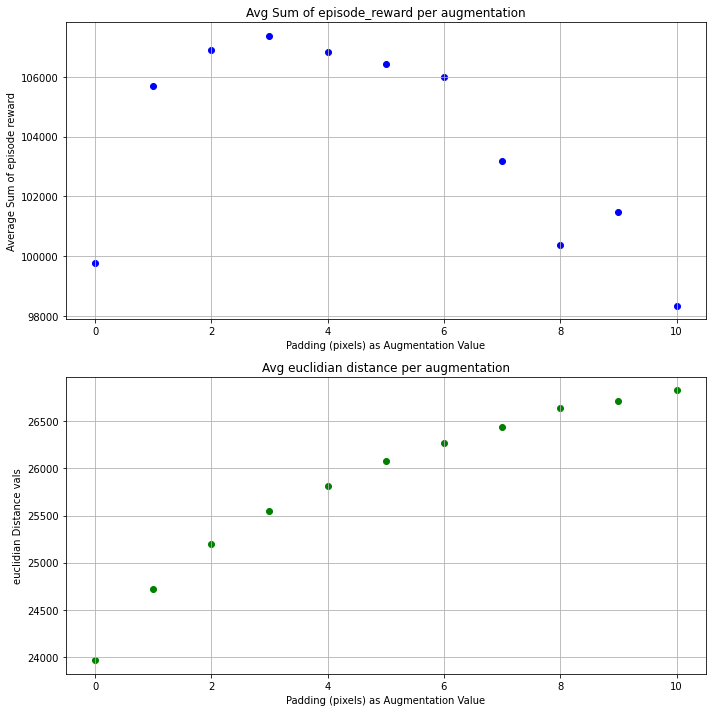

In [22]:
stats_distance_name = 'euclidian'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)



correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)


proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.645730846910492
Pearson correlation coefficient (maxes over sums): 0.6893597151818252
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


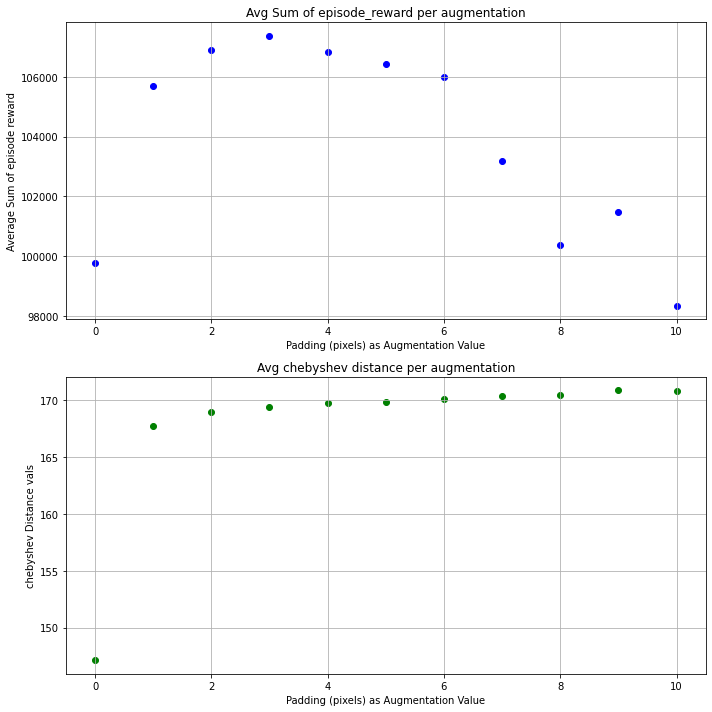

In [23]:
stats_distance_name = 'chebyshev'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)


correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.9674594138957862
Pearson correlation coefficient (maxes over sums): 0.9740245550682309
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


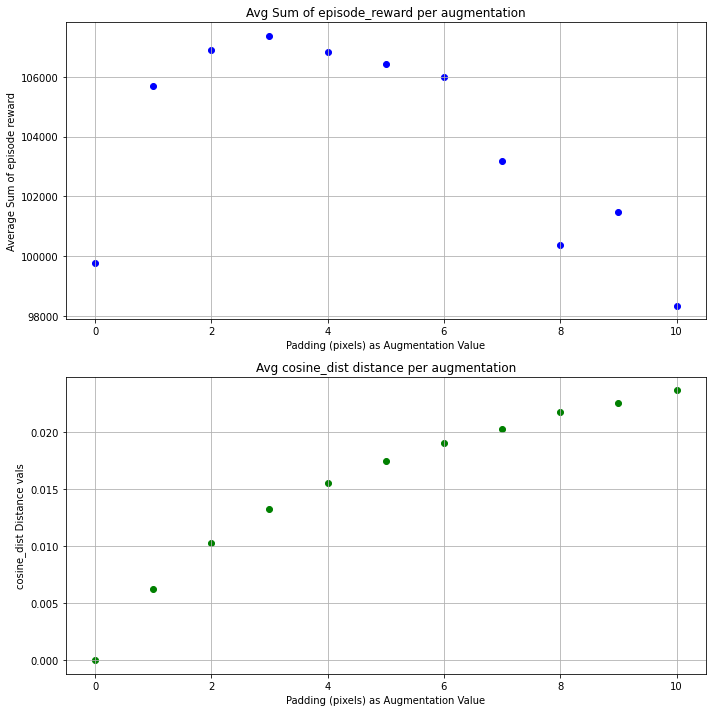

In [24]:
stats_distance_name = 'cosine_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.9775520235945911
Pearson correlation coefficient (maxes over sums): 0.9688016655508741
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


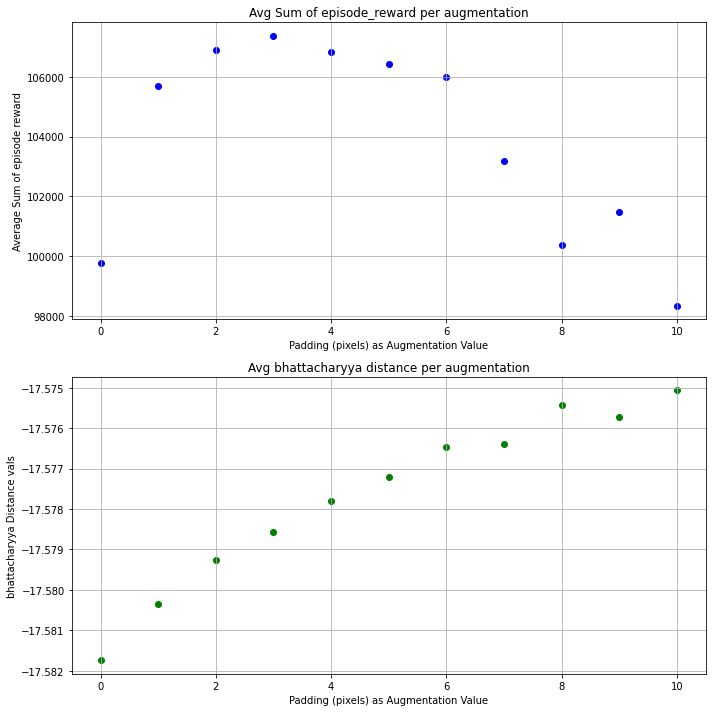

In [25]:
stats_distance_name = 'bhattacharyya'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.798057123624582
Pearson correlation coefficient (maxes over sums): 0.8489566614546286
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


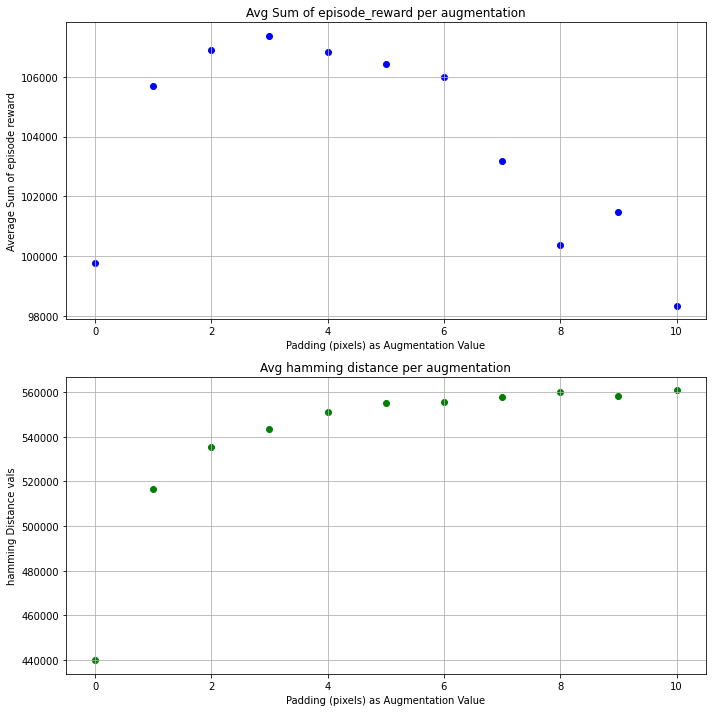

In [26]:
stats_distance_name = 'hamming'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.9786312902904137
Pearson correlation coefficient (maxes over sums): 0.9716627486729924
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


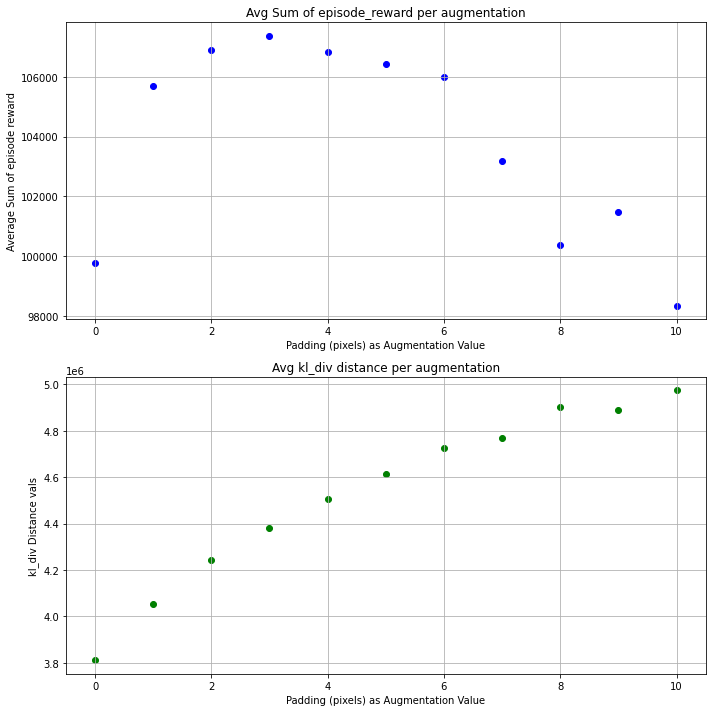

In [27]:
stats_distance_name = 'kl_div'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.9598599353805414
Pearson correlation coefficient (maxes over sums): 0.9655006531355487
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


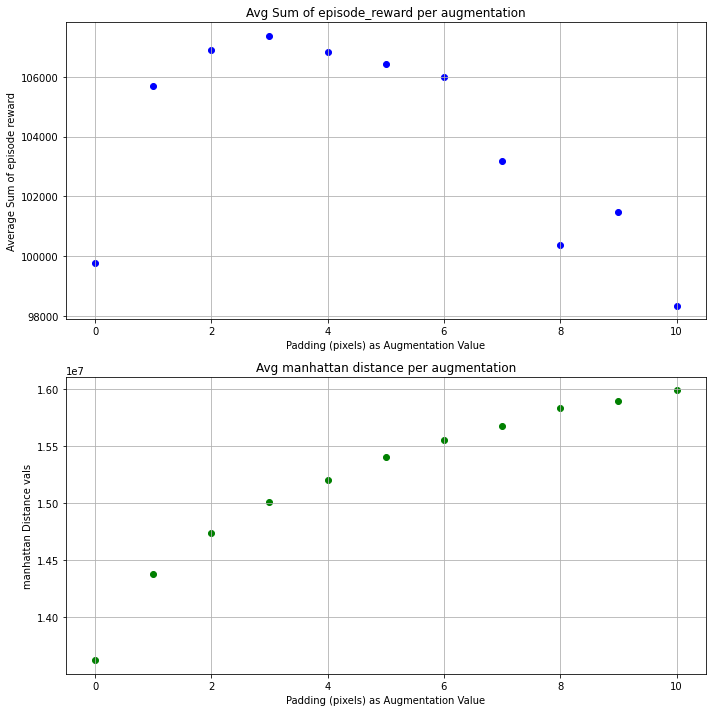

In [28]:
stats_distance_name = 'manhattan'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.7036151885455315
Pearson correlation coefficient (maxes over sums): 0.6109154972133379
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


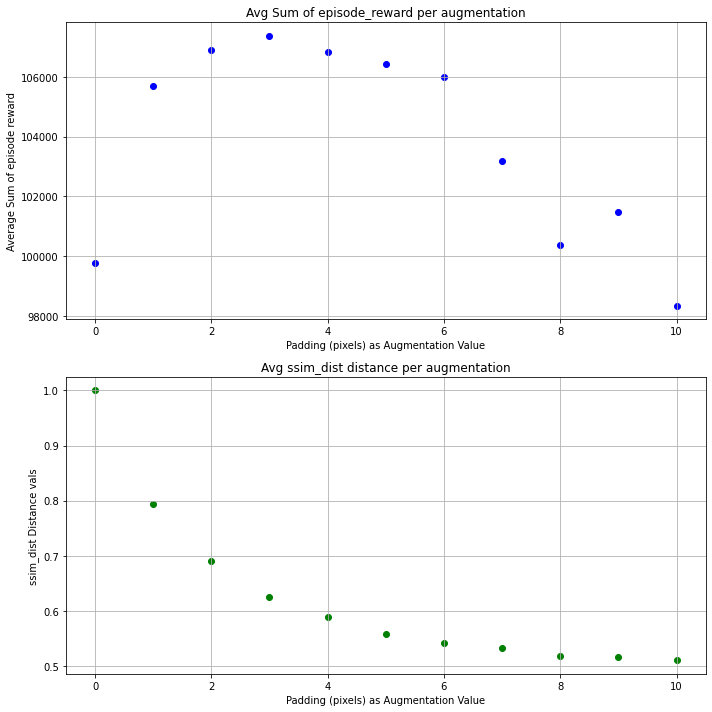

In [29]:
stats_distance_name = 'ssim_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')